


# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set from TMBD  focuses on the information about 10,000 movies, including user perception and the revenue of each movie.
the structure of this data set has 21 columns such as imdb_id, revenue, budget, vote_count etc.
the mian objective of the project is answering the key questions that truly detrmine our understanding of the data set.


### Question(s) for Analysis

<ul>
    <li>What were the most popular produced genres in 1995 compared to 2015? </li>
    <li>Which genres are most popular from year to year?</li>
    <li>make diagram to show the total earned profit vs release year</li>
    <li>what is the total revenue of all movies each year</li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
 # Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
 
 After monetoring the dataset and suggested questions. For the analysis we will be keeping only essential data and deleting the dublicated and null(non-valued) data so that we can make our analysis easy and managable for the common users. 




In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
tmdb = pd.read_csv('tmdb-movies.csv')
#print the first five row of tmdb dataset
tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


### show dataset description

In [3]:
#show the description of dataset (mean,count ,min,max) to investigate data
tmdb.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41



### Data Cleaning
the main goal will be to remove unused columns that we won't be needing such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
 we'll also be foucing on Changing format of budget and revenue column and Replacing zero with NAN in runtime column.
 there are Some movies in the database that have zero budget or zero revenue, that indicates that there are values has not been recorded so we will be getting rid of them such entries.
 one more important technique that we'll be using is Changing release date column into date format, and also Removing the duplicacy in the rows(if needed).
 

In [4]:
#get information about data
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Show diagram to describe each column in data

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

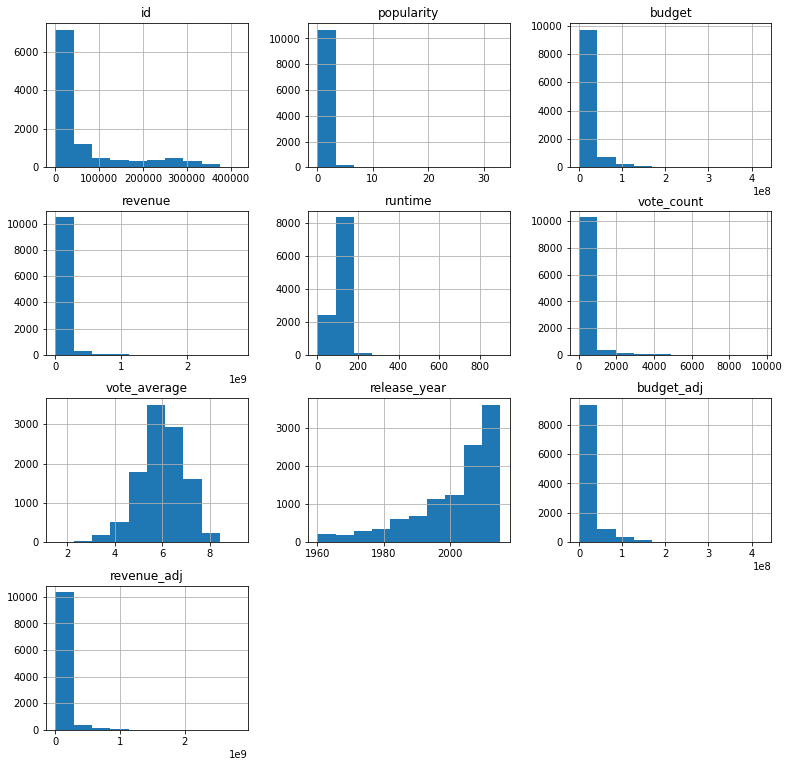

In [5]:
#create a histogram to get overview on our data
tmdb.hist(figsize=(13,13))

### check  how many rows with dublication

In [6]:
tmdb.duplicated().sum()

1

### remove dublication  

In [7]:
#remove dublicated rows
tmdb.drop_duplicates(keep ='first', inplace=True)


In [8]:
#show the number of columns and rows
print("number of rows: {} columns: {}".format(tmdb.shape[0],tmdb.shape[1]))
#show columns have a null values
tmdb.isnull().any()


number of rows: 10865 columns: 21


id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### Removing null vlaues

In [9]:
#remove null values in rows
tmdb['director'].replace(0, np.NAN, inplace=True)
tmdb['genres'].replace(0, np.NAN, inplace=True)
tmdb['cast'].replace(0, np.NAN, inplace=True)
tmdb['tagline'].replace(0, np.NAN, inplace=True)
tmdb['production_companies'].replace(0, np.NAN, inplace=True)
tmdb['overview'].replace(0, np.NAN, inplace=True)
tmdb['keywords'].replace(0, np.NAN, inplace=True)
tmdb['homepage'].replace(0, np.NAN, inplace=True)
tmdb.dropna(axis=0, inplace=True)
#ensure that all null values removed
tmdb.isnull().any()


id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### Replace zeros values in runtime column

In [10]:
tmdb['runtime'] =tmdb['runtime'].replace(0, np.NAN)

## show the data type of dataset

In [11]:
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### change data type of budget and revenue to int

In [12]:
list_change_types=['budget', 'revenue']
tmdb[list_change_types]=tmdb[list_change_types].applymap(np.int64)
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### 1- what is Average runtime of the movies

in this question will discuss the average runtime of movies and make it understandable as plot diagram

In [13]:
# create a function to calculate the mean for any column
def average_function(column):
    return tmdb[column].mean()
print('The average of movies runtime : {}'.format(average_function('runtime')))

The average of movies runtime : 106.14673366834171


##### create a diagram function to show the average runtime of movies

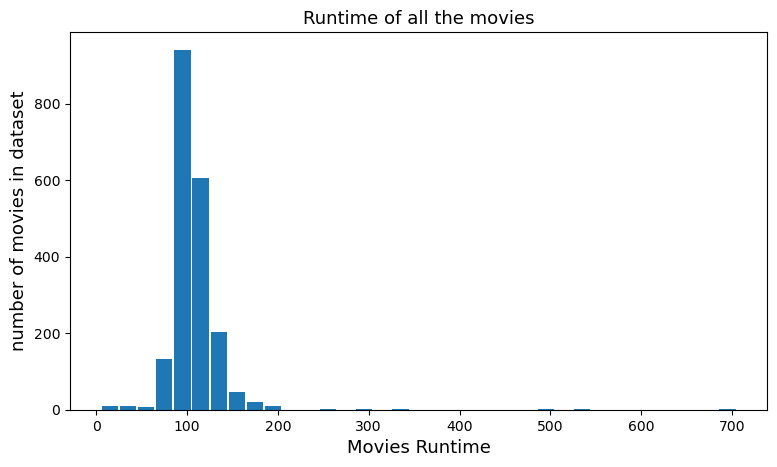

In [14]:
#create a plot graph for runtime of movies

plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('Movies Runtime', fontsize = 13)
plt.ylabel('number of movies in dataset', fontsize=13)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=13)

#giving a histogram plot
plt.hist(tmdb['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

## 2- show wich movies have more popularity long movie or short movie

in this question will explore which movies better that have long or short time

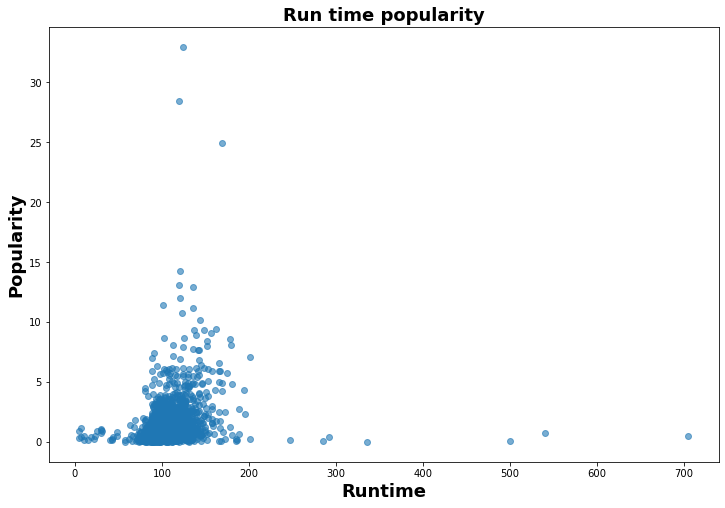

In [15]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter = plt.scatter(tmdb['runtime'],
            tmdb['popularity'], 
            alpha = 0.6) #transparency level of points on the plot. Used to avoid overplotting
            
# add and format additional elements, such as legends, titles and axis labels
plt.title("Run time popularity", 
          fontsize = 18, 
          weight = "bold")
plt.xlabel("Runtime",fontsize = 18, weight = "bold")
plt.ylabel("Popularity",fontsize = 18, weight = "bold")
plt.show()

## 3- what is the most popular geners

in this question discuss which genres the audience like the most

In [16]:
def separate_fun(column):
    #will take a column, and separate the string by '|'
    data = tmdb[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    genre_count = data.value_counts(ascending = False)
    return genre_count

genre_count = separate_fun('genres')

genre_count.head()

Drama        838
Comedy       640
Thriller     575
Action       532
Adventure    361
dtype: int64

#### Horizontal plot diagram to show the top popular genres

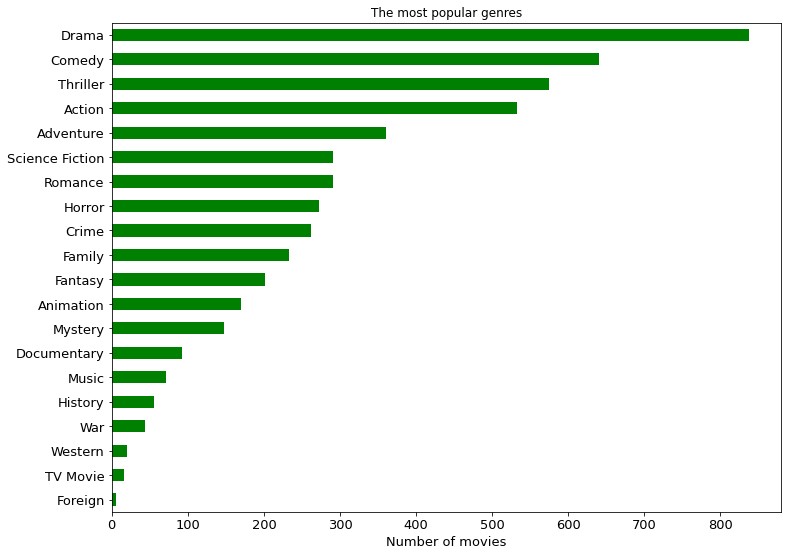

In [17]:
genre_count.sort_values(ascending = True, inplace = True)

lt = genre_count.plot.barh(color = 'green', fontsize = 13)

#set the title of graph
lt.set(title = 'The most popular genres')
# text on x axis
lt.set_xlabel('Number of movies', fontsize = '13')
#set the figure size
lt.figure.set_size_inches(12, 9)
plt.show()


## 4- which movies with least and most profit

in this question will explore movies profit and show using graph

In [18]:
tmdb.insert(3,'profit_total',tmdb['revenue']-tmdb['budget'])

In [19]:
##movie with least profit
print('Movie with least profit')
x=tmdb['profit_total'].min()
tmdb[tmdb['profit_total']==x]


Movie with least profit


,id,imdb_id,popularity,profit_total,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25,-413912431,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,...,An Asian assassin (Dong-gun Jang) is forced to...,100.00,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.40,2010,425000000.00,11087569.00


#### show movie with max profit

In [20]:
#movie this max profit
print('Movie with most profit')
x=tmdb['profit_total'].max()
tmdb[tmdb['profit_total']==x]

Movie with most profit


,id,imdb_id,popularity,profit_total,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.43,2544505847,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,...,"In the 22nd century, a paraplegic Marine is di...",162.00,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.10,2009,240886902.89,2827123750.41


#### show the mean of all movies profit

In [21]:
#the mean of profits
print('Movie profit mean')
tmdb['profit_total'].mean()

Movie profit mean


80666037.47439758

# 5- make diagram to show the total earned profit vs release year

the result will illustrate the code that discribes the total earned profit in comparison with the code resposiable for showing the release date

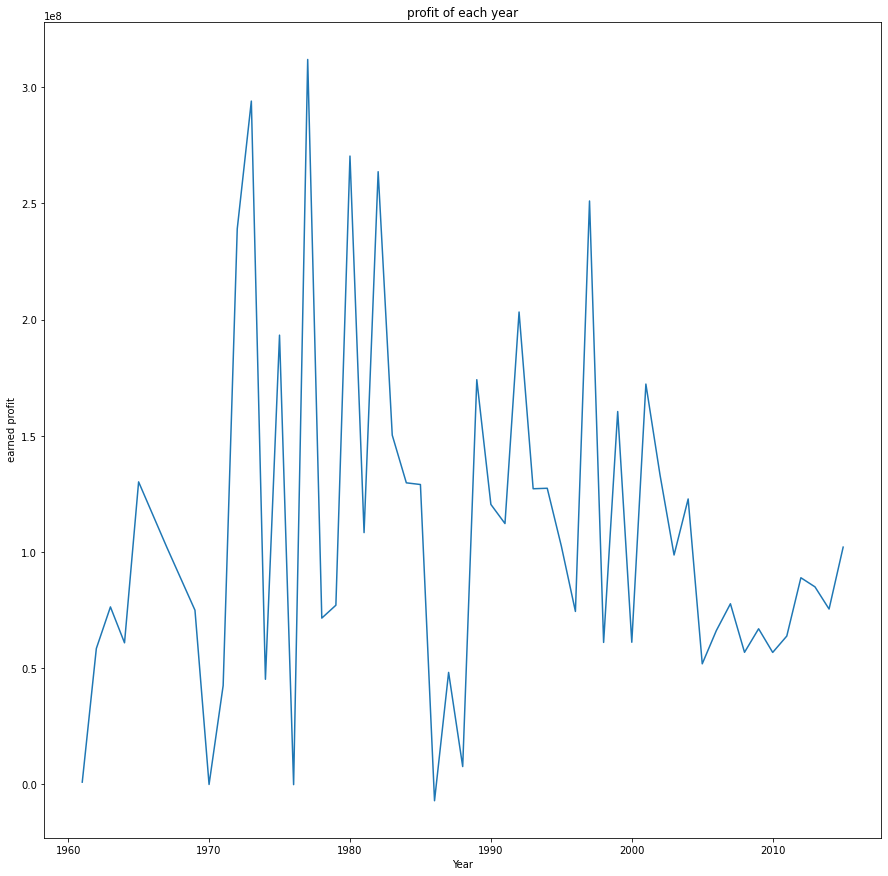

In [22]:
#diagram to show the profit of each year to know which year have max profit and low profit to know what is problem to have low profit to solve it in future
year_movie_profit=tmdb.groupby('release_year')['profit_total'].mean()
plt.figure(figsize=(15,15))
plt.title('profit of each year')
plt.xlabel('Year')
plt.ylabel(' earned profit')
plt.plot(year_movie_profit)

## 6-what is the total revenue of all movies each year

we explore how total revenue changed over years by using plot diagram

<AxesSubplot:title={'center':'average of revenue each year'}, xlabel='release_year', ylabel='average of revenue each year'>

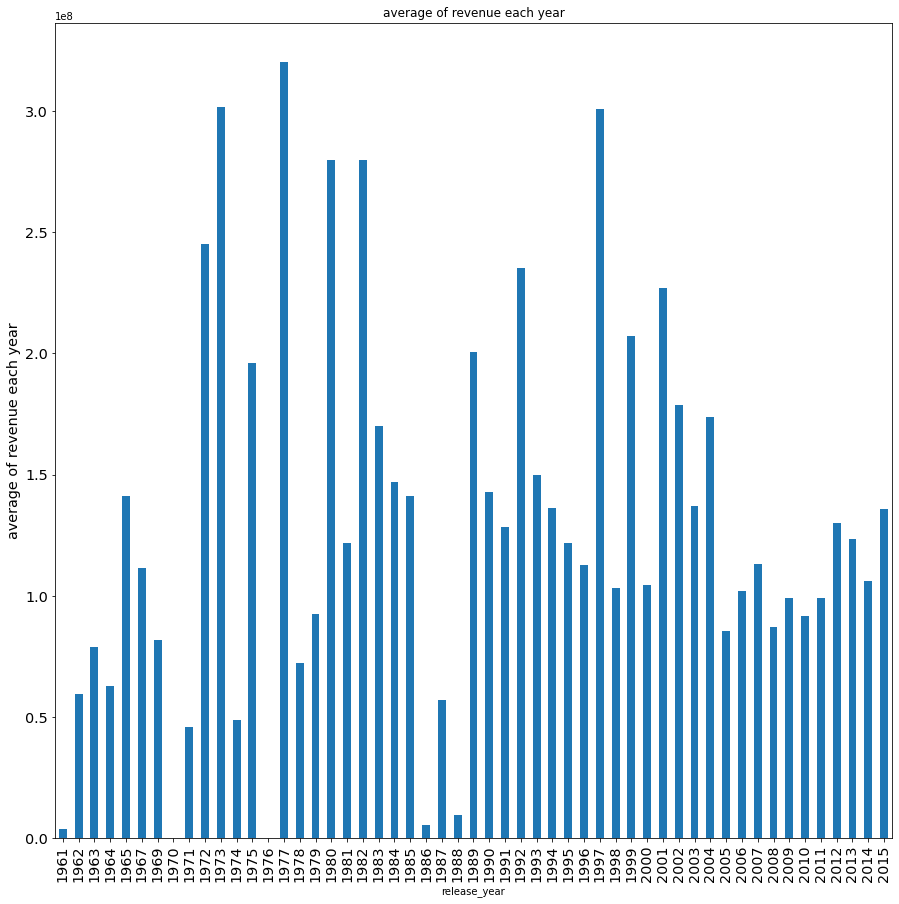

In [23]:
# graph show the average of revenue per year
plt.ylabel('average of revenue each year',fontsize='x-large')
tmdb.groupby('release_year')['revenue'].mean().plot(kind='bar',title='average of revenue each year',figsize=(15,15),fontsize='x-large')

### from this questions explore some important things in data first find the average runtime of movies , and make comparison between long and short movies to know which movies have more popularity, compare between genres of movies to know which genre have high rate,create a diagram to show the total revenue of all movies each year

<a id='conclusions'></a>
## Conclusions

first we make clean of dataset .remove dublication and null values row . remove unused columns.
start to investigate data with some question first show the average runtime of movies,find most popular movies,show wich movies with high profits, show the total profits with each year.The bigger the number of people that vote for a movie, the higher the revenue. This is most likely not a favourable sign for high-grossing films. High-grossing films are usually directed by Matt Damon, star Tom Cruise, and are of the action genre.

## Limitations
His analysis took into account the films that brought in a sizable profit of roughly $50 million. Although this may not be entirely error-free, by implementing these suggestions, one can raise the likelihood that a film will be a success. Furthermore, we are unsure about the accuracy and timeliness of the data that has been provided to us.another one of problem faced me while analysis data is that data type of revenue and budget needs to change to integer , find the total profit it was one of limitation because it not exist and calculate it from data . remove the dublication from data and unused columns , replace the null values in the data


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])